**End to End Classification Machine learning project**

**Predicting the Risk of Heart Attack**





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/heart attack project/heart_attack_risk_dataset.csv")
df.head(5)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


**Exploratory Data Analysis**

In [3]:
df.head()
df.info()
df.describe()
df['Heart_Attack_Risk'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

,count
Heart_Attack_Risk,
Low,25024
Moderate,14904
High,10072





Checking Missing values and Dublicates




In [4]:
df.isnull().sum()
df.duplicated().sum()

0




Observation : the data has no missing values and dublicates to analyze








Extracting categorical featueres:




In [5]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
df[categorical_features].head(5)
df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   50000 non-null  object
 1   Physical_Activity_Level  50000 non-null  object
 2   Stress_Level             50000 non-null  object
 3   Chest_Pain_Type          50000 non-null  object
 4   Thalassemia              50000 non-null  object
 5   ECG_Results              50000 non-null  object
 6   Heart_Attack_Risk        50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB





try to know some info about categorical features







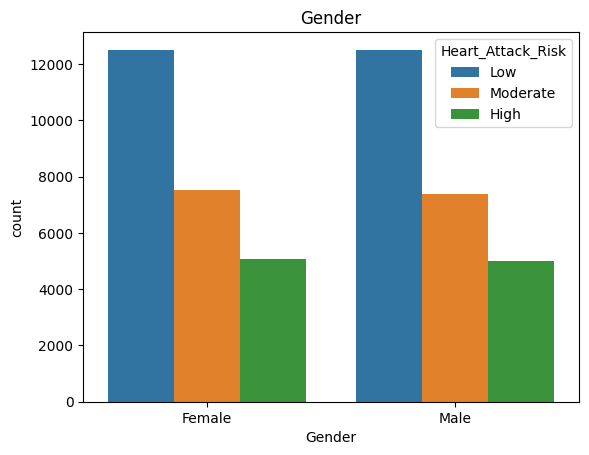

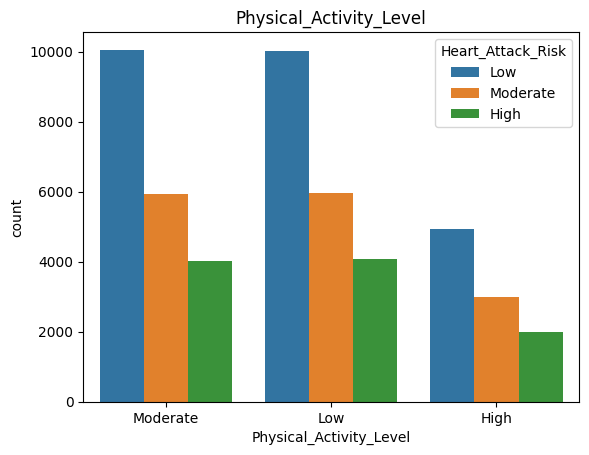

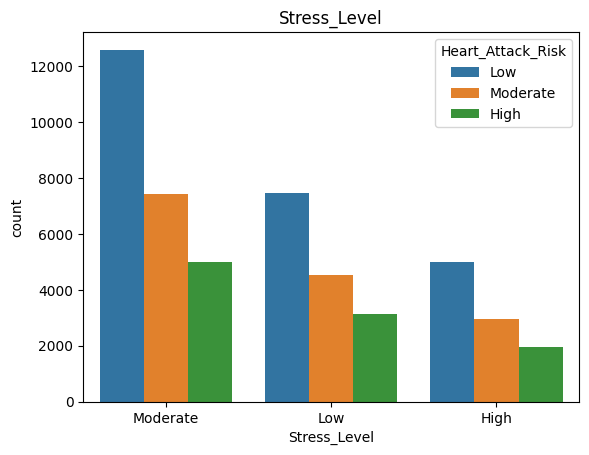

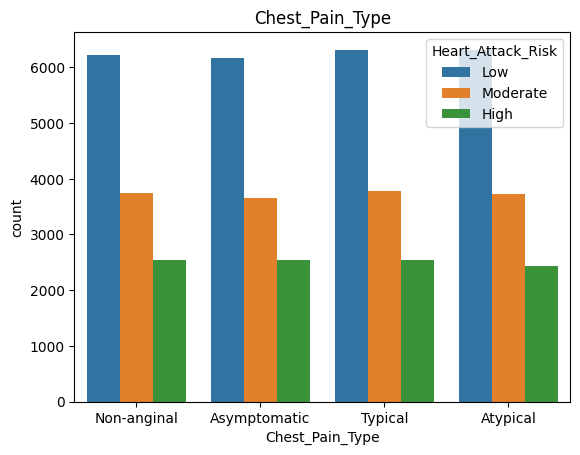

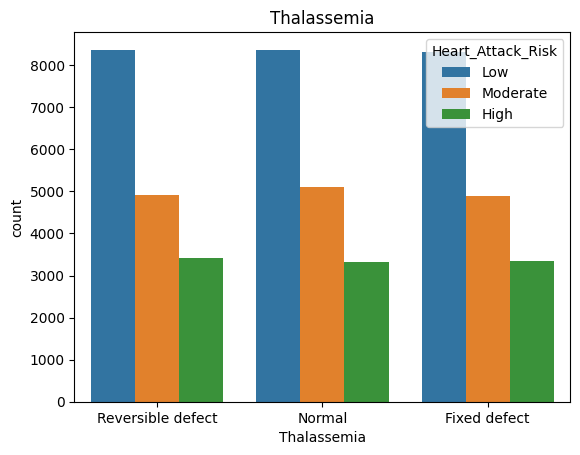

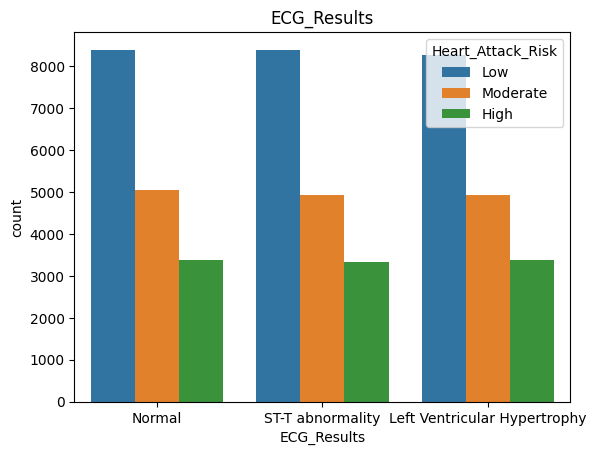

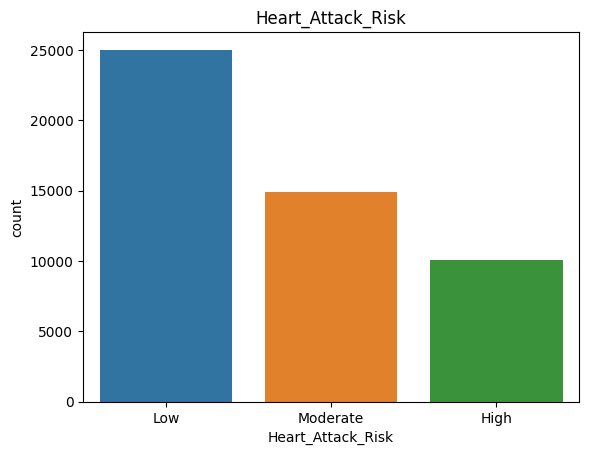

In [6]:
for feature in categorical_features :
    data = df.copy()

    sns.countplot(data=data , x=feature , hue='Heart_Attack_Risk')
    plt.title(feature)
    plt.show()

In [7]:
df[categorical_features].nunique()

,0
Gender,2
Physical_Activity_Level,3
Stress_Level,3
Chest_Pain_Type,4
Thalassemia,3
ECG_Results,3
Heart_Attack_Risk,3





Observation : the categorical features has low unique values in each feature (from 2 - 4 unique values)







Extracting numerical values




In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[numerical_features].head()
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Smoking                  50000 non-null  int64  
 2   Alcohol_Consumption      50000 non-null  int64  
 3   BMI                      50000 non-null  float64
 4   Diabetes                 50000 non-null  int64  
 5   Hypertension             50000 non-null  int64  
 6   Cholesterol_Level        50000 non-null  float64
 7   Resting_BP               50000 non-null  int64  
 8   Heart_Rate               50000 non-null  int64  
 9   Family_History           50000 non-null  int64  
 10  Fasting_Blood_Sugar      50000 non-null  int64  
 11  Exercise_Induced_Angina  50000 non-null  int64  
 12  Max_Heart_Rate_Achieved  50000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 5.0 MB





get the discrete values




In [9]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 20]
df[discrete_features].head()
df[discrete_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Smoking                  50000 non-null  int64
 1   Alcohol_Consumption      50000 non-null  int64
 2   Diabetes                 50000 non-null  int64
 3   Hypertension             50000 non-null  int64
 4   Family_History           50000 non-null  int64
 5   Fasting_Blood_Sugar      50000 non-null  int64
 6   Exercise_Induced_Angina  50000 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB





visualize discrete features




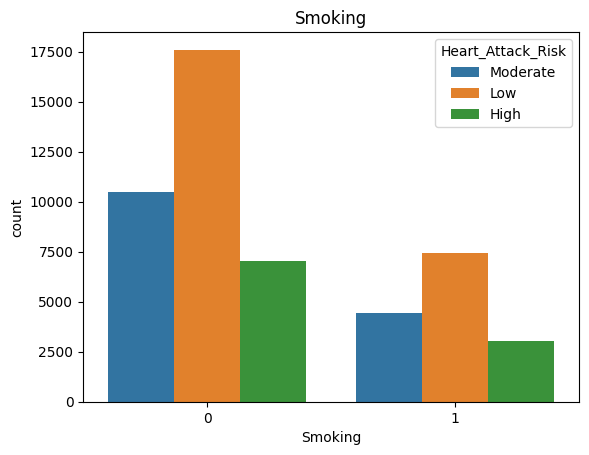

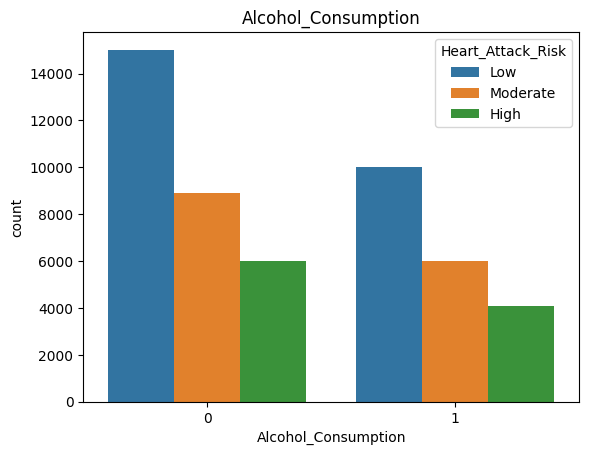

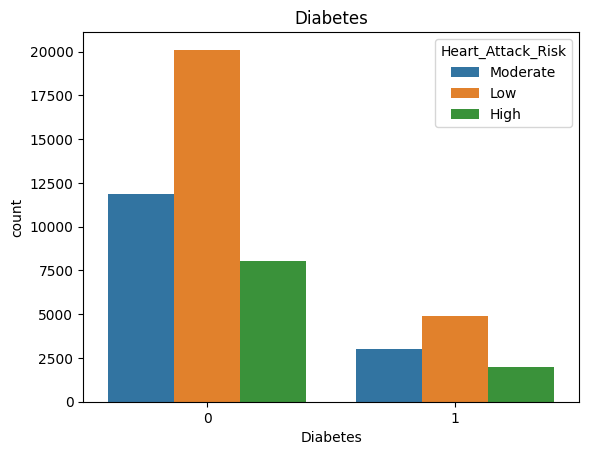

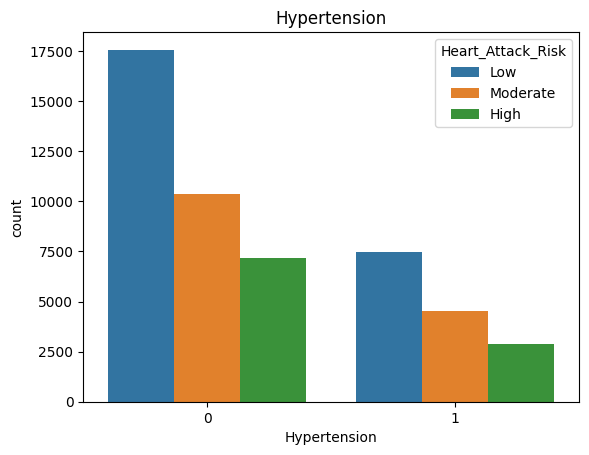

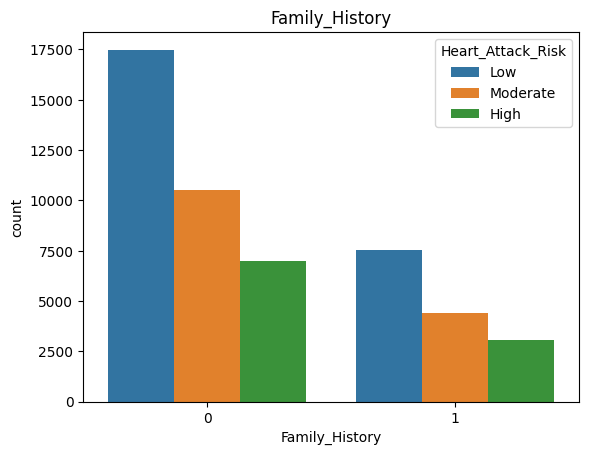

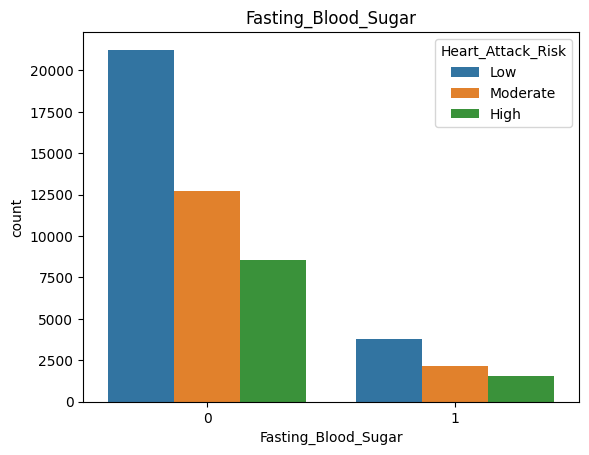

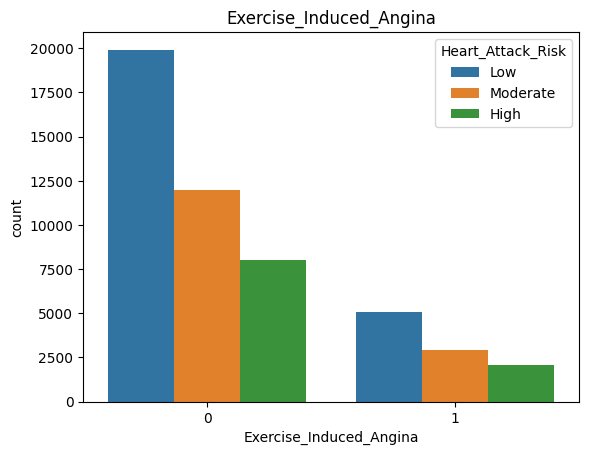

In [10]:
for feature in discrete_features:
    data = df.copy()

    sns.countplot(data=data , x=feature , hue='Heart_Attack_Risk')
    plt.title(feature)
    plt.show()




Extract the continious values




In [11]:
continious_features = [feature for feature in df.columns if df[feature].dtype == 'float64' ]
df[continious_features].head()
df[continious_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BMI                50000 non-null  float64
 1   Cholesterol_Level  50000 non-null  float64
dtypes: float64(2)
memory usage: 781.4 KB





visualizing continious values:
    
apply log transform to the feature to make it appear in normal distrbution




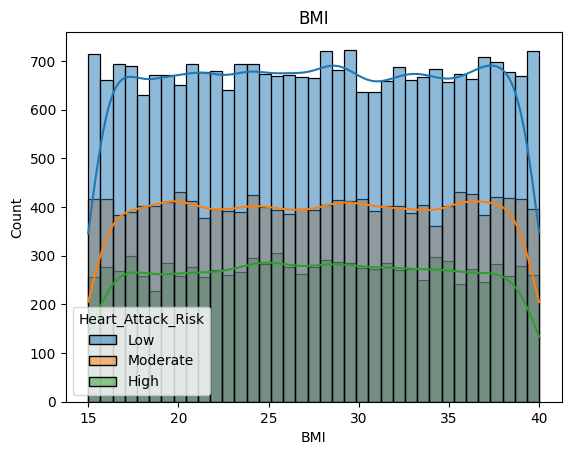

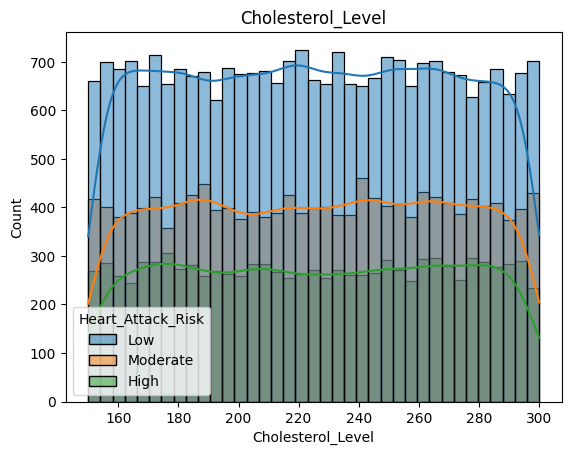

In [12]:
for feature in continious_features :
    data = df.copy()
    df[feature] = np.log(df[feature])
    sns.histplot(data=data , x=feature ,hue='Heart_Attack_Risk' , kde=True)
    plt.title(feature)
    plt.show()




Observation : the heart attack risk increases as long as the BMI increases

Check for Outliers




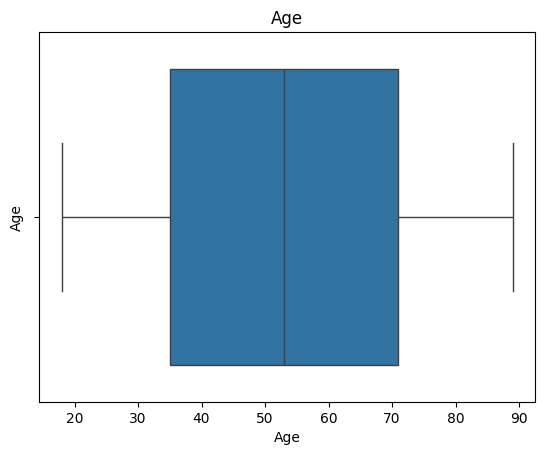

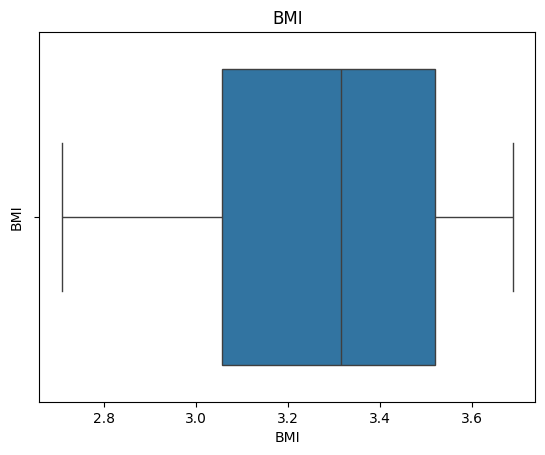

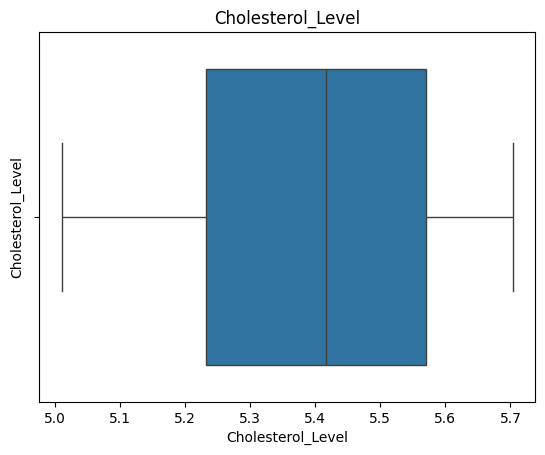

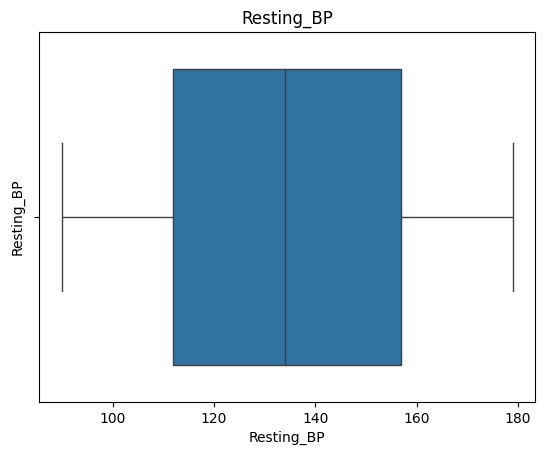

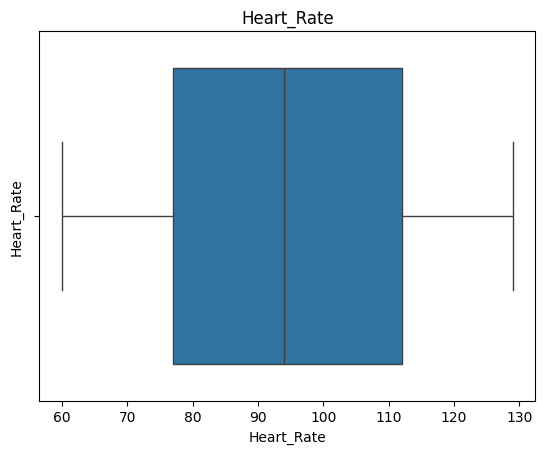

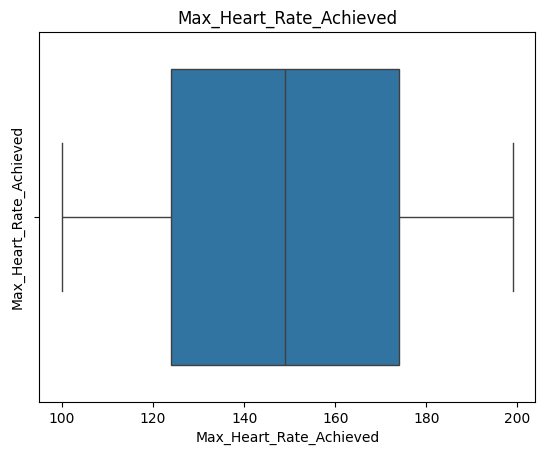

In [13]:
for feature in numerical_features :
    data = df.copy()

    if 0 in data[feature].unique() :
        pass
    else :
       sns.boxplot(x=data[feature])
       plt.ylabel(feature)
       plt.title(feature)
       plt.show()




Observation : we have Outliers

Check whether the data is balanced or not




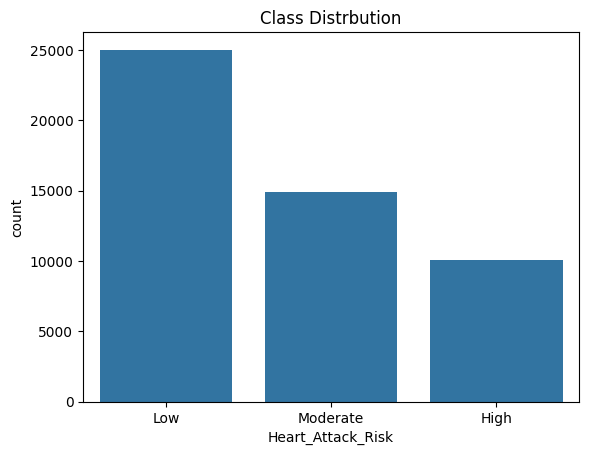

In [14]:
df['Heart_Attack_Risk'].value_counts()

sns.countplot(data=df , x='Heart_Attack_Risk')
plt.title('Class Distrbution')
plt.show()




Observation : the class is not balanced (the low values is 2.5 times the high values)

Correlation of the data




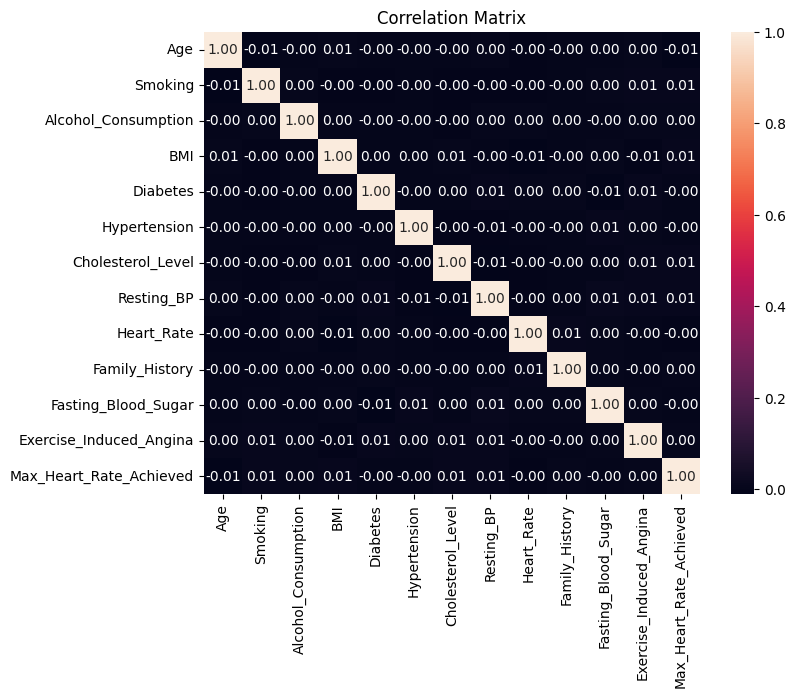

In [15]:
correlation_matrix=df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




Observation : the features have no correlations , so we have to extract new features




**Feature Engineering**




Extract new features to try to catch correlation




In [16]:
df['smoking_alcohol_risk'] = df['Smoking'] * df['Alcohol_Consumption']
df['smoking_alcohol_risk'] .head()

df['family_Fasting_Blood_Sugar'] = df['Family_History'] * df['Fasting_Blood_Sugar']
df['family_Fasting_Blood_Sugar'].tail()

,family_Fasting_Blood_Sugar
49995,0
49996,0
49997,0
49998,0
49999,0





Data Binning




In [17]:
df['BMI']
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)
df['BMI_Category'].head()
df.drop('BMI' , inplace=True ,axis=1 )
df['BMI_Category'] = df['BMI_Category'].astype(object)

sorted_unique_ages = np.sort(df['Age'].unique())
sorted_unique_ages
age_bins = [18,30,50,80]
age_labels = ['young' , 'adult' , 'old_man']
df['Age_categories'] = pd.cut(df['Age'], bins=age_bins ,labels=age_labels)
df['Age_categories'] = df['Age_categories'].astype(object)
df.drop('Age' , inplace=True ,axis=1 )




Feature Transformation




In [18]:
new_numerical_values = [feature for feature in df.columns if feature not in categorical_features and df[feature].dtype != 'O']
df[new_numerical_values].info()

from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
df[new_numerical_values] = normalizer.fit_transform(df[new_numerical_values])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Smoking                     50000 non-null  int64  
 1   Alcohol_Consumption         50000 non-null  int64  
 2   Diabetes                    50000 non-null  int64  
 3   Hypertension                50000 non-null  int64  
 4   Cholesterol_Level           50000 non-null  float64
 5   Resting_BP                  50000 non-null  int64  
 6   Heart_Rate                  50000 non-null  int64  
 7   Family_History              50000 non-null  int64  
 8   Fasting_Blood_Sugar         50000 non-null  int64  
 9   Exercise_Induced_Angina     50000 non-null  int64  
 10  Max_Heart_Rate_Achieved     50000 non-null  int64  
 11  smoking_alcohol_risk        50000 non-null  int64  
 12  family_Fasting_Blood_Sugar  50000 non-null  int64  
dtypes: float64(1), int64(12)
memory

Handling categorical features

In [19]:
new_categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
df[new_categorical_features].head()
df[new_categorical_features].nunique()

,0
Gender,2
Physical_Activity_Level,3
Stress_Level,3
Chest_Pain_Type,4
Thalassemia,3
ECG_Results,3
Heart_Attack_Risk,3
BMI_Category,1
Age_categories,3


Extracting Ordinal Features

In [20]:
ordinal_features = ['Physical_Activity_Level' ,'Stress_Level','Heart_Attack_Risk','BMI_Category','Age_categories' ]
df[ordinal_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Physical_Activity_Level  50000 non-null  object
 1   Stress_Level             50000 non-null  object
 2   Heart_Attack_Risk        50000 non-null  object
 3   BMI_Category             50000 non-null  object
 4   Age_categories           43208 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


Applying label encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for feature in ordinal_features :
    df[feature] = encoder.fit_transform(df[feature])

In [22]:
non_ordinal_feature = [feature for feature in new_categorical_features if feature not in ordinal_features]


Apply One-Hot Encoding to non-ordinal categorical features

In [23]:
df = pd.get_dummies(df, columns=non_ordinal_feature, drop_first=True)

Handling Outliers

In [24]:
for feature in new_numerical_values:
    data = df[feature]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5* IQR
    upper_limit = Q3 + 1.5*IQR
    df[feature] = np.where(df[feature] < lower_limit, lower_limit, df[feature])
    df[feature] = np.where(df[feature] > upper_limit, upper_limit, df[feature])

The data is not balanced, so we have to balance it because feature selection will be biased towards the dominant feature.

In [25]:
X = df.drop('Heart_Attack_Risk', axis=1)
y = df['Heart_Attack_Risk']

from imblearn.over_sampling import SMOTE
over_sampler = SMOTE()
X_resampled , y_resampled = over_sampler.fit_resample(X,y)

- Since the features in our dataset exhibit no significant correlations ( there is no need to eliminate any features), and given that we are not working with high-dimensional data, we will proceed by omitting the feature selection step and train the model using all available features.

In [26]:
from sklearn.model_selection import train_test_split
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='Heart_Attack_Risk')], axis=1)
sampled_data = resampled_data.sample(frac=0.2, random_state=42)
X_sampled = sampled_data.drop('Heart_Attack_Risk', axis=1)
y_sampled = sampled_data['Heart_Attack_Risk']
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

taking sample from the data to train the model , because the data is too large

**Modeling**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report

In [33]:
svc_model = SVC()
svc_param = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svc_model,param_grid=svc_param,cv=3,n_jobs=-1)
grid_search.fit(X_train_sample,y_train_sample)

grid_search.best_params_



{'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

trianing the model with the best parameters ,and now take all the data

In [37]:
model = SVC(degree= 2, gamma= 'auto', kernel='rbf')
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
y_predicted


array([0, 0, 1, ..., 0, 1, 2])

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_test, y_predicted)
print("Classification Report:\n", report)

Accuracy: 0.4225
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.47      0.45      5058
           1       0.42      0.53      0.47      4987
           2       0.40      0.27      0.32      4970

    accuracy                           0.42     15015
   macro avg       0.42      0.42      0.41     15015
weighted avg       0.42      0.42      0.41     15015

